***
# <center>***Building a Regression MLP Using the Sequential API***
***

*To solve the California housing problem using a regression neural network with an MLP (Multilayer Perceptron) in TensorFlow/Keras, you will need to follow these steps:*

#### **1. Install necessary libraries:** Make sure you have tensorflow and sklearn installed:

In [ ]:

!pip install tensorflow scikit-learn


**2. Import libraries:**

In [1]:

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [29]:

import warnings
warnings.filterwarnings('ignore')


**3. Load the California housing dataset:** You can fetch this dataset directly from scikit-learn or use fetch_openml for a more flexible solution: 

In [37]:

california_housing = fetch_openml('california_housing', version=1)
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
target = california_housing.target


**Data Inspection:**

In [38]:

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   ocean_proximity     20640 non-null  category
dtypes: category(1), float64(8)
memory usage: 1.3 MB


In [39]:

data.isnull().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [40]:

data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)


In [41]:

data.isnull().sum()


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

**4. Check for categorical columns:** Inspect the dataset to see which columns are categorical and need encoding.

In [42]:

print(data.dtypes)


longitude              float64
latitude               float64
housing_median_age     float64
total_rooms            float64
total_bedrooms         float64
population             float64
households             float64
median_income          float64
ocean_proximity       category
dtype: object


**5. Encode categorical columns:** If there are categorical columns (such as ocean_proximity or others), use pd.get_dummies() or LabelEncoder to convert them into numeric form:

In [43]:

data = pd.get_dummies(data, drop_first=True)  # This will convert categorical columns to numeric


**6. Preprocessing the data:** Split the dataset into features (X) and target (y), then scale the data for neural network training:

In [44]:

X = data
y = target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**7. Build the MLP model:** Using the Sequential API to build a regression model. This example uses 3 dense layers:

In [45]:

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer with 1 neuron for regression
])


**8. Compile the model:** Use mean squared error (mse) as the loss function for regression and an optimizer like Adam.

In [46]:

model.compile(optimizer='adam', loss='mse')


**9. Train the model:** Train the model with your training data:

In [47]:

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 53292597248.0000 - val_loss: 14570467328.0000
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 11217982464.0000 - val_loss: 7802137088.0000
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 7241789952.0000 - val_loss: 6361364480.0000
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 5932212224.0000 - val_loss: 5640726528.0000
Epoch 5/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 5295671296.0000 - val_loss: 5251969024.0000
Epoch 6/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 5203005440.0000 - val_loss: 5056436224.0000
Epoch 7/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 4833082368.0000 - val_loss: 4932821504.0000
Epoch 8/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 4588409344.0000 - val_loss: 4850617344.0000
Epoch 9/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 4695386112.0000 - val_loss: 4790775808.0000
Epoch 10/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 

**10. Evaluate the model:** After training, evaluate the model on the test set.

In [48]:

loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")


129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4274410240.0000
Test Loss: 4284196608.0



**11. Make predictions:** After training and evaluating the model, you can use it to make predictions on new data.


In [49]:

y_pred = model.predict(X_test)


129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


**12. Visualize the results:** You can compare predicted vs. actual values.

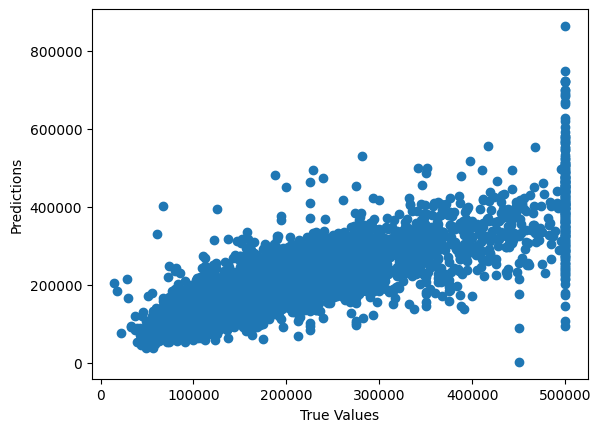

In [50]:

import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()


### **Observations:**

**Scatter Plot:**
- The scatter plot shows the relationship between the true values (actual values) and the predictions made by the model.  
Each point represents a data sample. The x-coordinate of the point is the true value, and the y-coordinate is the corresponding prediction.

**Overall Trend:**
- The points generally follow a diagonal upward trend, indicating that the model's predictions are positively correlated with the true values. This is a good sign, suggesting that the model is capturing the underlying patterns in the data.

**Accuracy:**
- The tightness of the points around the diagonal line gives an indication of the model's accuracy.  
If the points were tightly clustered around the diagonal, it would suggest high accuracy. However, in this case, there is some scatter around the line, indicating that there is room for improvement in the model's accuracy.

**Outliers:**
- There are some points that appear to be far away from the main trend. These are likely outliers. Outliers can sometimes negatively impact the model's performance.


**Interpretation:**
- The model is able to capture the general trend in the data and make predictions that are positively correlated with the true values.
- There is some room for improvement in the model's accuracy, as indicated by the scatter around the diagonal line.
- Outliers might be affecting the model's performance and could be investigated further.


## **There's more...**

In [ ]:

from tensorflow.keras.optimizers import SGD

model_1 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer with 1 neuron for regression
])

 
model_1.compile(loss="mean_squared_error", optimizer=SGD(learning_rate=0.001, momentum=0.9, nesterov=True))


history = model_1.fit(X_train, y_train, epochs=20,validation_data=(X_test, y_test))

mse_test = model_1.evaluate(X_test, y_test)

X_new = X_test[:3] # pretend these are new instances

y_pred = model.predict(X_new)


Epoch 1/20


In [52]:
data.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64